# Exercice 1 - Visualisation et filtrage

## 1.1 Recherche d'un enregistrement et affichage de celui ci 

### Question 1

Dans cette premier partie nous cherchons de trouver un enregistrement qui contient à la fois un signal ABP et un signal PLETH (qui correspond à PPG). En cherchant sur la basse de donne MIMIC indiqué sur la fiche du TP nous avosn trouvé l'enregistrement p028897-2169-03-18-21-26 qui appartient à la base de donnée  p02/p028897.

Nous alons utiliser la librairie wfdb que nous alons utilisé egalement pendant le TP1 pour recuperrer les donnes de cet enregistrement afin de les tracher en utilisant la librairie matplot.

**Nota bene:** Les librairies necesaires sont deja installé depuis le deroulement du TP1 donc nous avons pas besoin de reproceder à l'installation des libraires wfdb et matplot pour cette instance.

In [1]:
import wfdb

record_path = "/Users/vasilisskarleas/Library/Mobile Documents/com~apple~CloudDocs/Documents/ETS University/GTS880/Lab/Lab_2/signals/3173069_0001"
header_1 = wfdb.rdheader(record_path)
record_1 = wfdb.rdrecord(record_path) 

print(record_1.sig_name)

['II', 'MCL', 'AVR', 'RESP', 'PAP', 'CVP', 'ABP', 'PLETH']


On peut observer que les noms des signaux presents dans cet enregistrement sont ['II', 'AVR', 'MCL', 'RESP', 'PLETH', 'ABP', 'PAP', 'CVP'] qui correspondent bien aux signaux que nous avons visualisé en ligne comme vous pouvez remarque ci-dessous.

![image](images/p028897-2169-03-18-21-26.png)

Mainteant nous procedons avec le trache tous les canaux de l'enregistrement en question. Pour faire cela, on peut recuperer tous les signaux individuelment sous forme des listes numpy en utilisant la parametre *p_signals* qui va retourner les metriques des signaux physiques (les donnees effectivement) selon https://wfdb-python.readthedocs.io/en/latest/io.html.

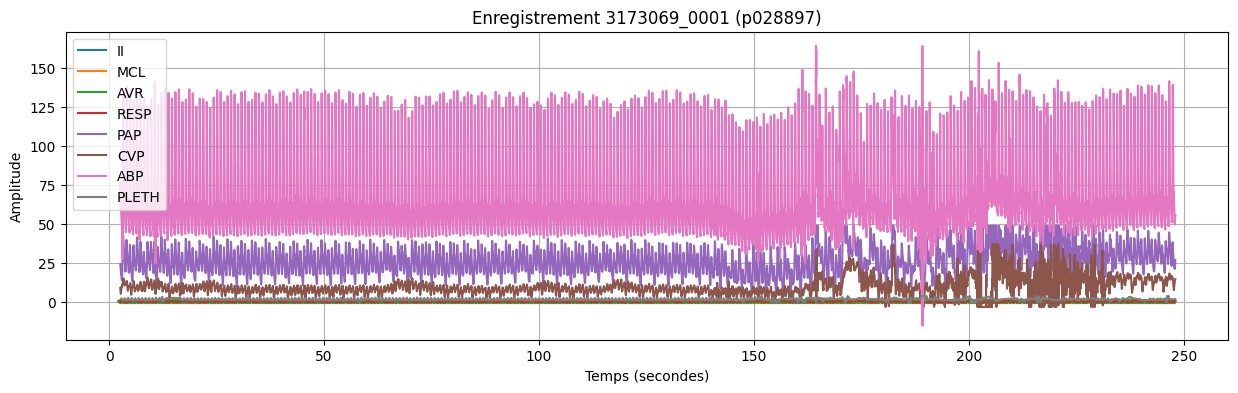

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Vecteur temps
temps_1 = np.arange(len(record_1.p_signal)) / record_1.fs

plt.figure(figsize=(15, 4))
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.title(f'Enregistrement 3173069_0001 (p028897)')
plt.grid(True)

# Les differents signaux avec leurs noms en legend
for i, name in enumerate(record_1.sig_name):
        plt.plot(temps_1, record_1.p_signal[:, i], label=name)
plt.legend()
plt.show()

### Question 2

Ici nous alons se focaliser sur l'enregistrement p04/p046223/3729975_0001. Voici l'implementation pour le trace de cet enregistrement:

In [3]:
record_path = "/Users/vasilisskarleas/Library/Mobile Documents/com~apple~CloudDocs/Documents/ETS University/GTS880/Lab/Lab_2/signals/3729975_0001"
header_2 = wfdb.rdheader(record_path)
record_2 = wfdb.rdrecord(record_path) 

print(record_2.sig_name)

['PLETH', 'RESP', 'ABP', 'II', 'V', 'AVR']


Sur cette enregistrement on va observer les signaux suiantes:

* **PLETH:** Correspond au signal PPG qu'il s'agit des variations du volume sanguin.
* **RESP:** Correspond au signal de respiration qui reflète les mouvements respiratoires du patient. Selon le cours, il pourrait etre mesuré en utilisant une centure de respiration placée sur la poitrine.
* **ABP:** Correspond au signal de la pression arterielle invasive, qui est mesuré en utilisant un cathéter intra-artériel.
* **II:** Correspond a la difference de potentiel entre le bras droit et la jambe gauche (vue en cours du signal ECG). C'est vue caractéristique de l’activité électrique du cœur qu'on utilise pour surveiller le rythme cardiaque, donné par la formule *II = LL-RA*.
* **V:** Correpond aux six dernières dérivations (dérivations précordiales) qui sont formées par la différence de tension entre les dérivations précordiales et la borne centrale de Wilson donnée par la formule *Vw = (RA+LA+LL)/3*.
* **AVR:** Il s'agit d'une derivation augmenté (composant du signal ECG) qui mesure le voltage sur le bras droit par rapport à une référence moyenne des électrodes sur le bras gauche et la jambe gauche. Il donné par la formule *aVR=3(RA-Vw)/2*.

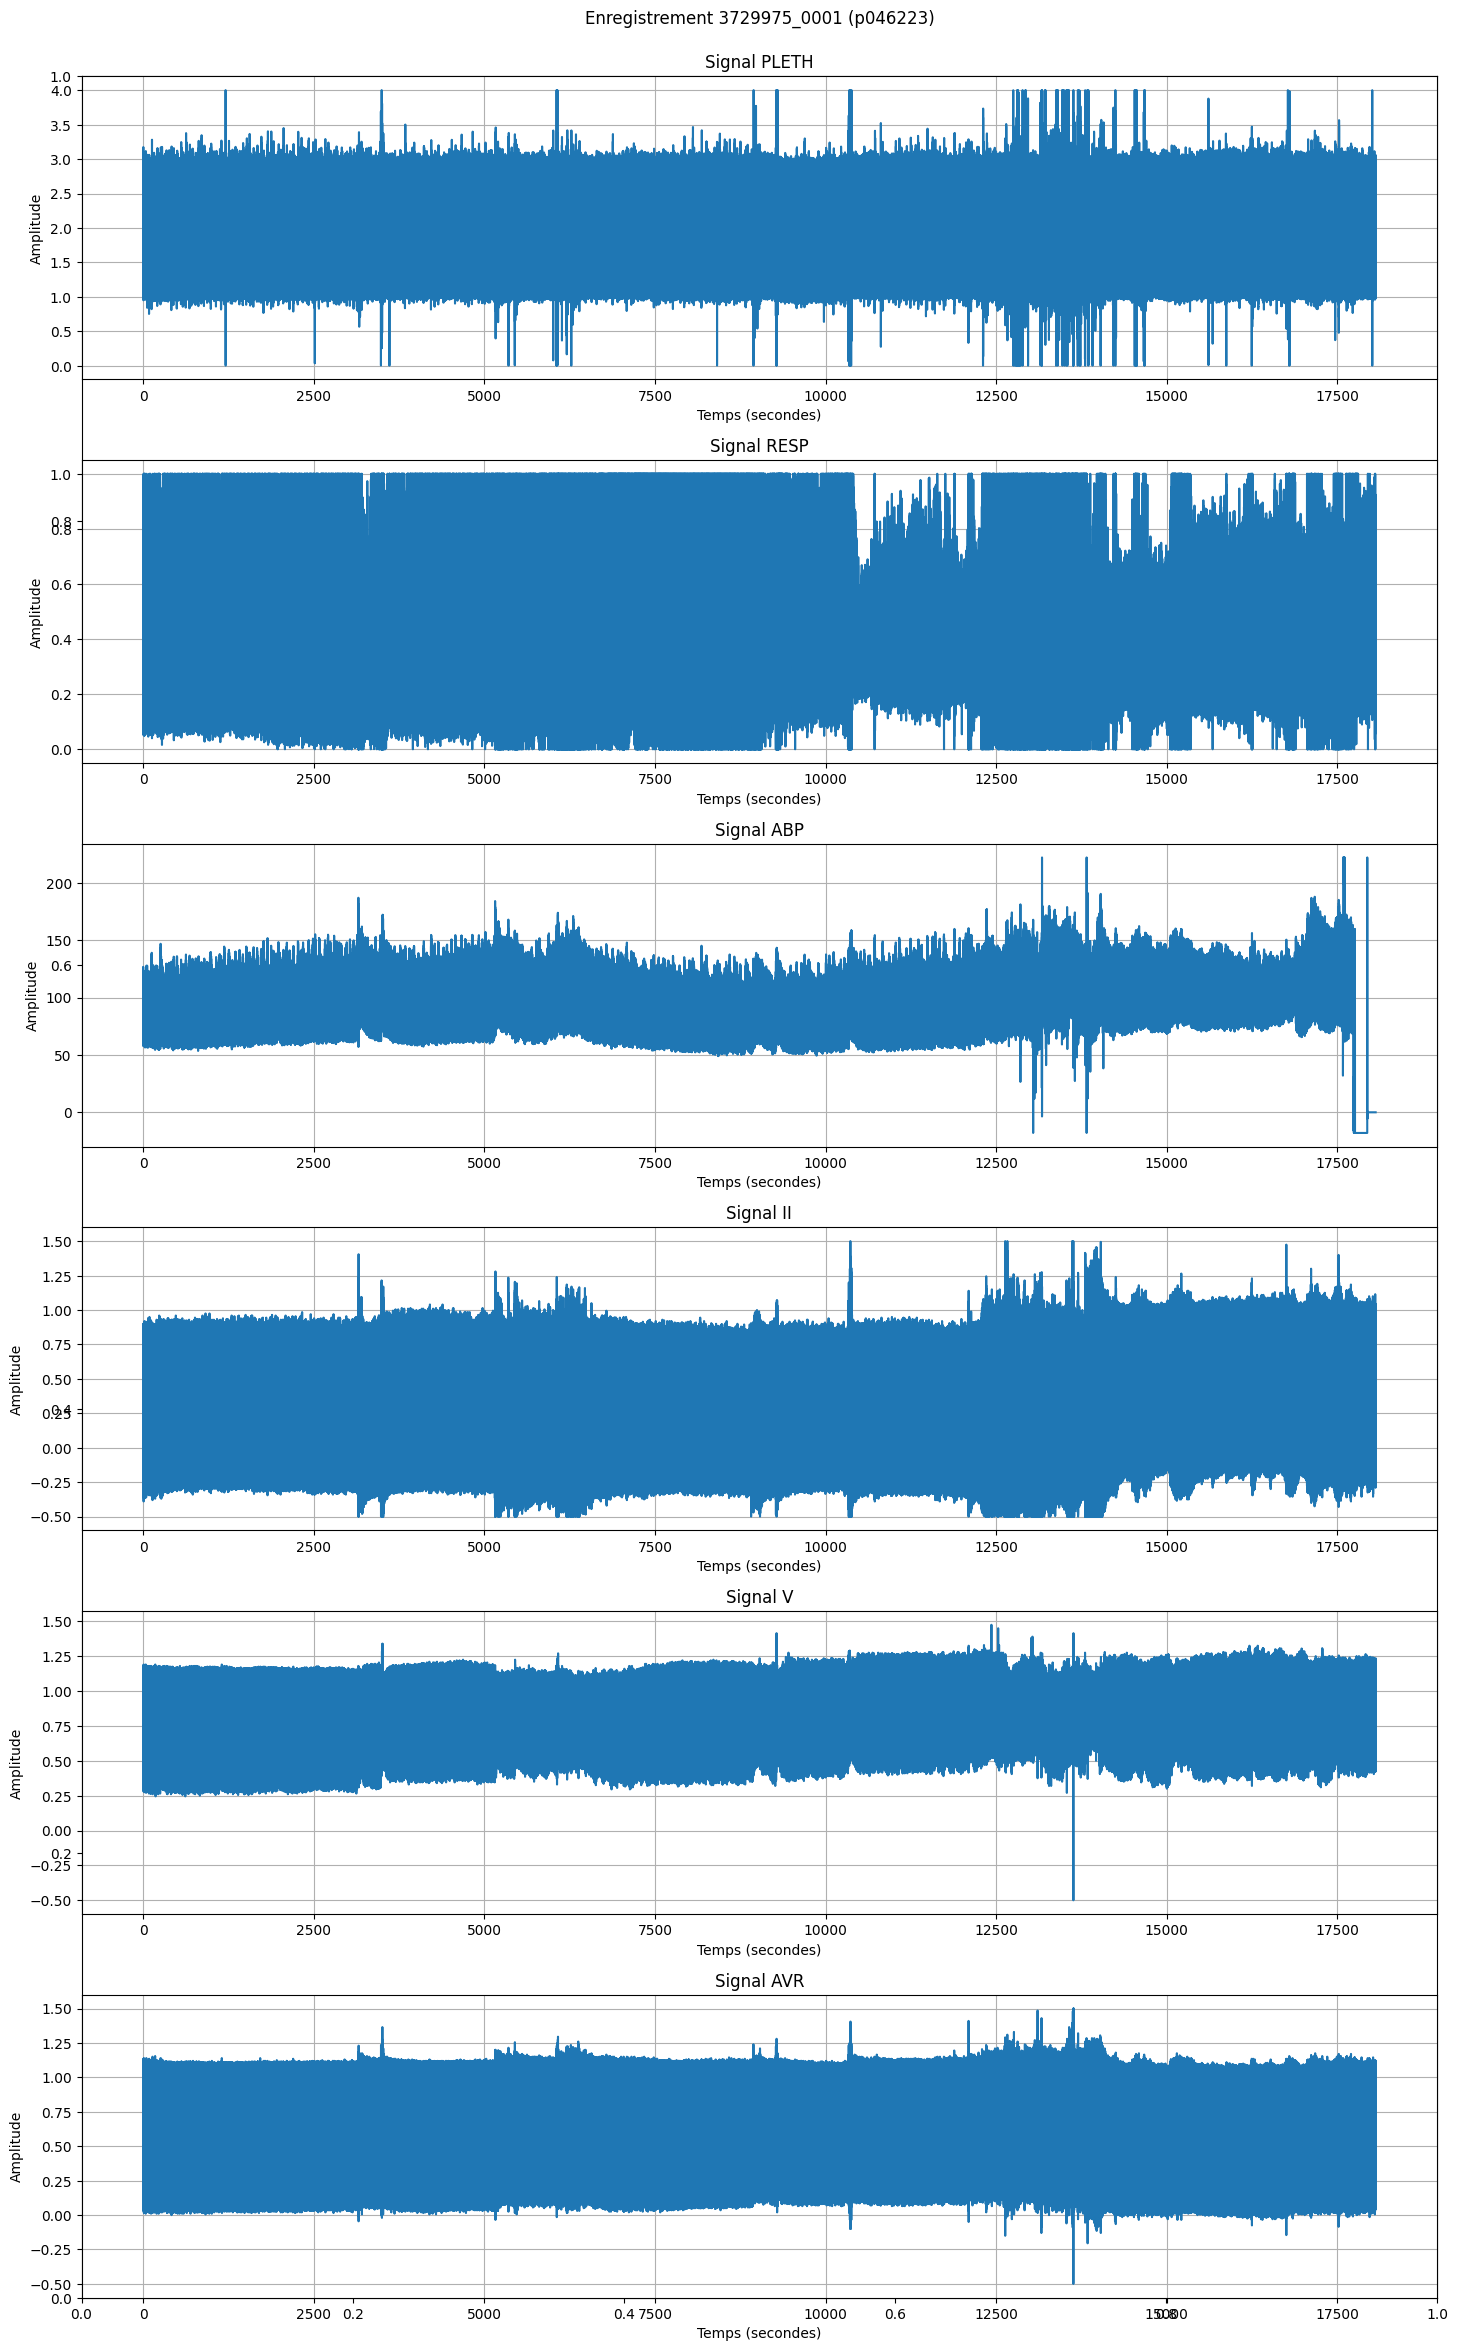

Frequence d'échantillonnage: 125 Hz


In [4]:
# Vecteur temps
temps_2 = np.arange(len(record_2.p_signal)) / record_2.fs # en secondes

plt.figure(figsize=(15, 4 * len(record_2.sig_name)))
plt.title(f'Enregistrement 3729975_0001 (p046223)', y=1.02)

for i in range(len(record_2.sig_name)):
    plt.subplot(len(record_2.sig_name), 1, i + 1)
    plt.xlabel('Temps (secondes)')
    plt.ylabel('Amplitude')
    plt.xlabel('Temps (secondes)')
    plt.title(f'Signal {record_2.sig_name[i]}')
    plt.grid(True)
    plt.plot(temps_2, record_2.p_signal[:, i])


plt.tight_layout()
plt.show()

print(f"Frequence d'échantillonnage: {record_2.fs} Hz")

**Nota bene:** Nous utilisons la fonctionne tight_layout() pour ajuster automatiquement nos sous-plots.

### Question 3

Comme vue au TP1, pour afficher les morceaux des signaux pendant 10 secondes à partir du temps de départ = 30 s, ca veut dire de 30 secondes à 40 secondes. Pour cela on sait que la frequence de 'echantillonage est 125 Hz, donc on sait qu'il existe 125 points par seconde. Ainsi nus on cherche le point de debut à 30 seconds qui est 30 * 125 = 3750, jusque 40 * 125 = 5000. Donc pour l'intervale 30 secondes à 40 secondes on se focalise sur l'intervalle des points de donness entre 3750 et 5000.

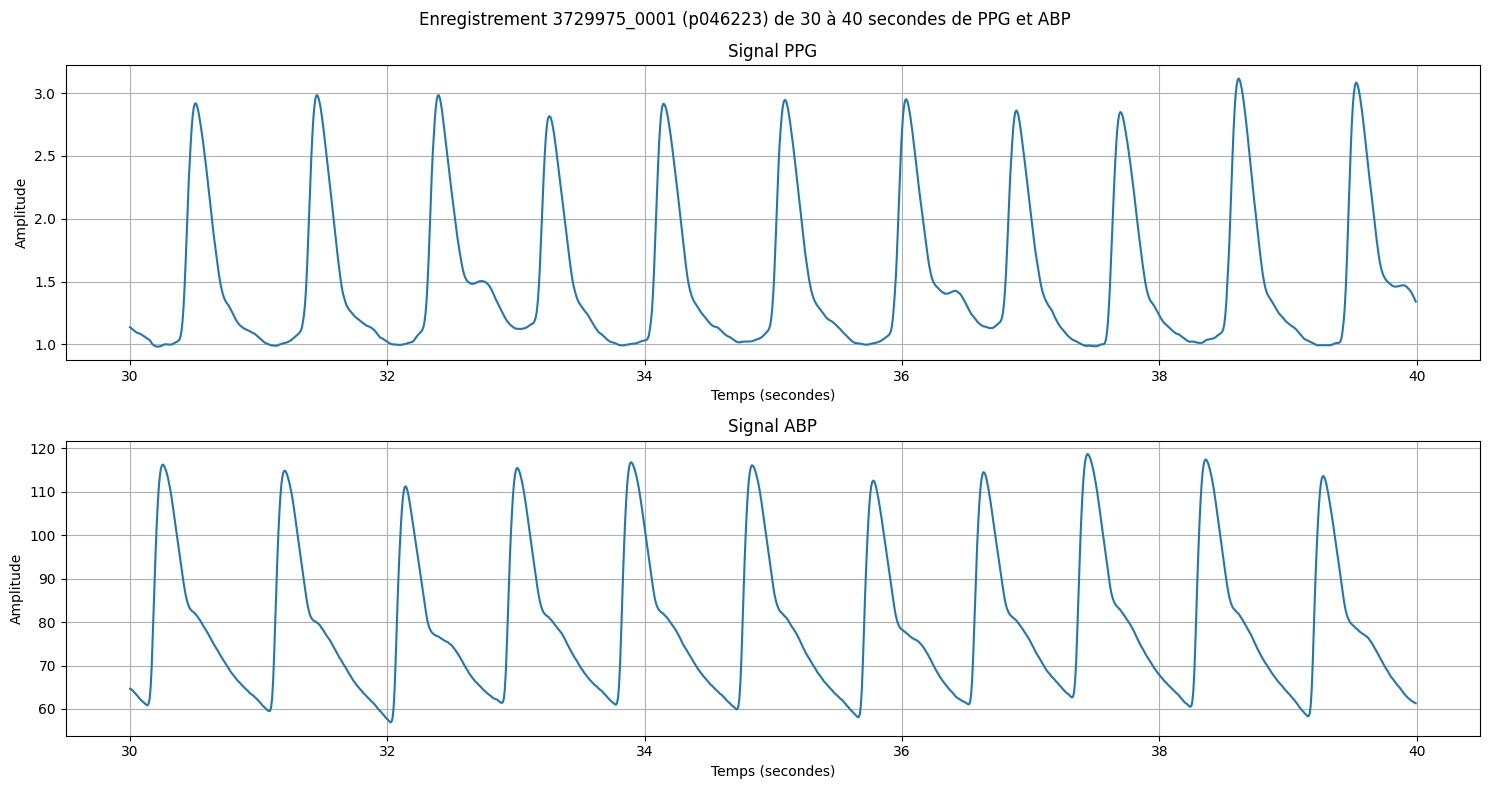

In [5]:
debut = 30 * record_2.fs
fin = 40 * record_2.fs
 
# On trouve les indices des collognes pour PLETH (PPG) et ABP
ppg = record_2.sig_name.index("PLETH")
abp = record_2.sig_name.index("ABP")

# Extraction des nos deux signaux en question en utilisant les indices calculé et les repartisions des signaux sur la matrice p_signal
signal_ppg = record_2.p_signal[int(debut):int(fin), ppg]
signal_abp = record_2.p_signal[int(debut):int(fin), abp]

# Vecteur temps
temps_segment = np.arange(int(debut), int(fin)) / record_2.fs

fig, axes = plt.subplots(2, 1, figsize=(15, 4 * 2)) # ici nous avons 4 * 2 car nous avons 2 signaux a afficher
fig.suptitle(f'Enregistrement 3729975_0001 (p046223) de 30 à 40 secondes de PPG et ABP')

# Affichage
axes[0].plot(temps_segment, signal_ppg)
axes[0].set_title("Signal PPG")
axes[0].set_xlabel("Temps (secondes)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

axes[1].plot(temps_segment, signal_abp)
axes[1].set_title("Signal ABP")
axes[1].set_xlabel("Temps (secondes)")
axes[1].set_ylabel("Amplitude")
axes[1].grid()

plt.tight_layout()
plt.show()


#### Relation entre ABP et PPG

Comme nous avons deja evoque, le signal ABP correspond au signal de la pression arteriel. Le PPG réagit à chaque battement cardiaque via une variation d’amplitude et de forme. Donc avec leur synchronisation nous pouvons realier chaque pic du signal PPG à un cycle cardiaque ABP.

## 1.2 Trouver le valeur de SBP et DBP via le signal ABP

### Question 1

Selon [(Kyung-Ah Sohn, 2021)](https://pmc.ncbi.nlm.nih.gov/articles/PMC7962188/), SBP correspond à la pression arterielle pendant la contraction du coeur et il s'agit de la valeur la plus élevée (maximale) de chaque pic du signal ABP. De meme, DBP correspond a la pressiona rteriel pendant la relaxion cardiaque et elle est identifiée comme la valeur la plus basse pendant chaque pic du signal ABP.

Pour trouver la valeur de SBP, nous utilisons la fonction *find_peaks* de la librairie scipy qui nous permettra de detecter ceux valeurs maximaux locaux. Pour la valeur de DBP, il suffit d'inverser le signal et chercher les maximums locaux comme avant car mainteant les pics seront inversé.

**Nota bene:** Il faut absolument trouver la distance minimale entre les deux pics (information à livrer à la fonction find_peaks). Pour un battement du coeur de 60 BPM alors la distance minimum serait 0.6 * frequence_echantillonage.

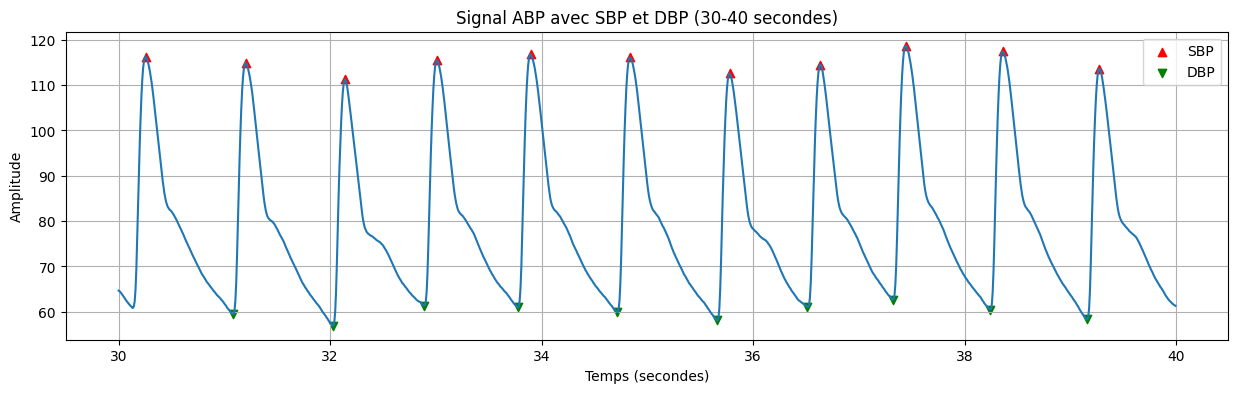

In [6]:
from scipy.signal import find_peaks

min_distance = int(0.6 * record_2.fs)

# Trouver les maximums et minimums locaux
sbp_peaks, _ = find_peaks(signal_abp, distance=min_distance, prominence=5)
dbp_peaks, _ = find_peaks(-signal_abp, distance=min_distance, prominence=5)


sbp_values = signal_abp[sbp_peaks]
dbp_values = signal_abp[dbp_peaks]

# memem plot que avant pour le ABP
plt.figure(figsize=(15, 4))
plt.plot(temps_segment, signal_abp)

# On ajouter les peaks
plt.scatter(temps_segment[sbp_peaks], signal_abp[sbp_peaks], color='red', marker='^', label=f"SBP")
plt.scatter(temps_segment[dbp_peaks], signal_abp[dbp_peaks], color='green', marker='v', label=f"DBP")

plt.title(f"Signal ABP avec SBP et DBP (30-40 secondes)")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


## 1.3 Filtre passe-bas de Butterworth

### Question 1

On applique un filtre passe bas d'ordre 2 avec une frequence de coupure à 4 Hz. Nous utilisons le meme principe vu en TP1 (filtre passe bande) sauf que cette fois nous alons creer un filtre passe bas. On applique toujours le theoreme de nyquist pour normaliser les frequences.

**Nota bene:** Nous utilisons filfit pour eviter l'aliasing ainsi que des problemes de synchronisation (dephasage).


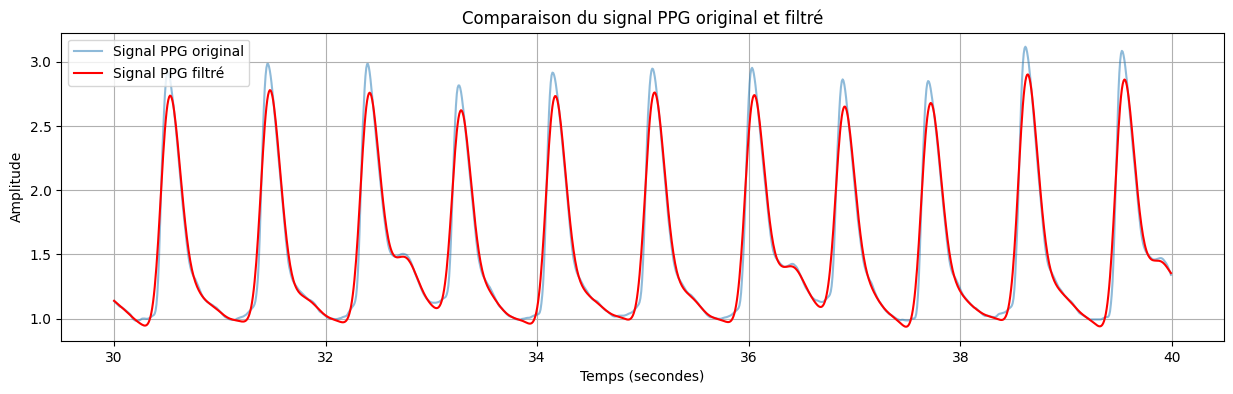

In [7]:
from scipy import signal

fc = 4
ordre = 2
nyq = 0.5 * record_2.fs

# Pour le filtre
a, b = signal.butter(ordre, fc / nyq, btype='low')

# Application du filtre
signal_ppg_filtered = signal.filtfilt(a, b, signal_ppg)

plt.figure(figsize=(15, 4))
plt.plot(temps_segment, signal_ppg, label='Signal PPG original', alpha=0.5)
plt.plot(temps_segment, signal_ppg_filtered, label='Signal PPG filtré', color='red')
plt.title('Comparaison du signal PPG original et filtré')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Question 2

Comme attendue par la definition du filtre passe bas, nous pouvons observer la suppression des hautes fréquences. Cela nous permet de reduire le bruit et des artefacts selon le cours, qui nous amene à une accentuation de la forme globale du signal PPG.

## 1.4 Reechantillonage

### Question 1

Pour effectuer le rééchantillonnage du signal PPG filtré, nous alons se baser sur le theoreme de Nyquit qui impose que la frequence d'echnatillonage soit au mois deux fois plus grande que la plus haute frequence du signal *fs_nouveau = 2 * fmax*. Dans notre cas après l'application du filtre passe bas fmax= 4 Hz, alors fe soit superieur que 8 Hz.

### Question 2

Ici nous sommes demandé d'ecrire un code pour reechnatiloner le signal PPG filtré à 10 Hz. Déjà selon la question preceent on peut s'assurer que avec une frequence d'echantillonage à 10 Hz nous aurons pas des effets de repliement spectral (aliasing).



In [8]:
from scipy.signal import resample_poly

fs = 125              # Fréquence initiale
fs_nouveau = 10        # Nouvelle fréquence visée

# Facteurs rationels (polyphasé)
gcd = np.gcd(int(record_2.fs), fs_nouveau)
up = fs_nouveau // gcd    # 10 // 5 = 2
down = int(fs) // gcd    # 125 // 5 = 25

# Application du rééchantillonnage
signal_ppg_filtered_reechantillone = resample_poly(signal_ppg_filtered, up, down)

# Axe temporel rééchantillonné
time_resampled = np.arange(len(signal_ppg_filtered_reechantillone)) / fs_nouveau



### Question 3

Vue que la frequence d'echantillonage de base est 125Hz, ca veut dire que nous avons 125 points chaque seconde. Selon le theoreme de Nyquist, il suffit d'avoir au moins 8 points par seconde pour le signal PPG reechantillone pour represneter tous les fluctuations du signal sans perte d'information importante. 

Pour notre cas, avec une frequence de reechantillonage à 10 Hz nous conservons 10 points par secondes ou encore on conserve seulement 8 % des données car 10/125 = 0.08.

Ca nous permet d'avoir une diminuation de la rendoance temporelle selon laquelle les échantillons supprimés n’apportent pas d’information supplémentaire pour le contenu fréquentiel du signal filtré. Comme ca nous avons une quantité des donnees diminué mais toujours representatif de notre situation, tout en garantissant l’absence d’aliasing grâce au filtre anti-repliement intégré à *resample_poly* selon notre sujet de TP2.

# Exercice 2 - Normalisation des donnees

## Chargement des donnees

Un dataset est deja fournis pour faciliter l'exploitation de donnees. Nous avons des donness pour l'entrainement et de donnees pour effectuer le test. Plus precisement:

* Data_Train_PPG.npy → (5000, 1250) : 5000 segments de 10 secondes de PPG (échantillonnés à 125 Hz → 1250 points par segment).
* Data_Train_Labels.npy → (5000, 2) : pour chaque segment, deux colonnes [SBP, DBP] correspondant à la moyenne de la pression systolique et diastolique dans ce segment.
* Data_Test_PPG.npy → (500, 1250) : 500 segments de PPG (même format que cidessus).
* Data_Test_Labels.npy → (500, 2) : valeurs moyennes de [SBP, DBP] associées.

Pour faire le chargement nous utilisons *np.load* et on effectue une verifcation rapide grace au parametre *shape* pour verifie rles tailles des nos donnees.

In [9]:
train_ppg = np.load("data/Data_Train_PPG.npy") # (5000, 1250)
train_labels= np.load("data/Data_Train_Labels.npy") # (5000, 2)
test_ppg = np.load("data/Data_Test_PPG.npy") # (500, 1250)
test_labels = np.load("data/Data_Test_Labels.npy") # (500, 2)

# Verification rapide
print(f"Train PPG shape: {train_ppg.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test PPG shape: {test_ppg.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train PPG shape: (5000, 1250)
Train labels shape: (5000, 2)
Test PPG shape: (500, 1250)
Test labels shape: (500, 2)


## 2.1 Reshape des donnees

### Questions 1 et 2

Nous souhaitons appliquer une normalisation pour améliorer les performances et la stabilité de l'apprentissage de notre modèle. Ici nous alons proceder avec la normalisation globale.

Pour appliquer la normalisation globale, nous alons calculer lees statistiques (min–max ou moyenne–écart type) sur tous les points de l’ensemble de données afin de préserver la forme et les amplitudes relatives des signaux physiologiques. Donc, nous alons aplatir temporairement en un seul vecteur. Pour le cas de train_ppg, nous avons 5000 examples avec 1250 points temporelles pour chaque example. Alors, dela va nous donner 6250000 points dans une collone puis on va appliquer *MinMaxScaler* pour faire la normalisation (partie 2.2 ci-dessous).

In [10]:
from sklearn.preprocessing import MinMaxScaler

# On fait l'aplatisement en un seul vecteur
train_ppg_reshaped = train_ppg.reshape(-1, 1)
test_ppg_reshaped = test_ppg.reshape(-1, 1)

print(f"\nAprès reshape train_ppg: {train_ppg_reshaped.shape}")
print(f"Après reshape test_ppg: {test_ppg_reshaped.shape}")


Après reshape train_ppg: (6250000, 1)
Après reshape test_ppg: (625000, 1)


## 2.2 Fit et transformation

### Questions 1, 2 et 3

Ici nous allons proceder avec la normalisation. La methode Min-Max permet d'échelonner chaque caractéristique sur tous les exemples d'entraînement dans l'intervalle (0, 1). Voici comment est qu'on peut avancer:

In [11]:
print(f"Forme originale train_ppg: {train_ppg.shape}")
print(f"Forme originale test_ppg: {test_ppg.shape}")

# Appliquons mainteant la normalisation globale aux labels (characteristques)
global_scaler = MinMaxScaler()

global_scaler.fit(train_ppg_reshaped)

train_ppg_normalized = global_scaler.transform(train_ppg_reshaped)
test_ppg_normalized = global_scaler.transform(test_ppg_reshaped)

# retour a la forme initiale
train_ppg_normalized_reshaped = train_ppg_normalized.reshape(train_ppg.shape)
test_ppg_normalized_reshaped = test_ppg_normalized.reshape(test_ppg.shape)

print(f"\nForme finale train_ppg_normalized_reshaped: {train_ppg_normalized_reshaped.shape}")
print(f"Forme finale test_ppg_normalized_reshaped: {test_ppg_normalized_reshaped.shape}")

Forme originale train_ppg: (5000, 1250)
Forme originale test_ppg: (500, 1250)

Forme finale train_ppg_normalized_reshaped: (5000, 1250)
Forme finale test_ppg_normalized_reshaped: (500, 1250)


**Remarque:** La fonction *fit* calcule le min et max de chaque collone (SBP et DBP) de la base des donnes train et les resultats sont sauvegardes sur *label_scaler*. Puis pour la normalisation des bases de donnees, on applique *transform* pour train et test egalement.

On remarque que pour la normalisation de la base des donnees de test nous utilisons les parametres calculés avec la base des donnees train. Cela nous permet de maintenir la coherence de l'echelle entre train et test.

De plus, ca  nous permet d'eviter la fuite des données, ca veut dire que vue que le model pour s'entrainer il faut jamais obtenir des informations (voir des information) de la base de donnees test, dans tous les cas il faut eviter d'utiliser fit avec le test_ppg car ca apres va implementer un biais supplementaire sur notre entrainement. Cela nous permet que les nouvelles donnees (pendant le test) sont inconnues pour simuler un scénario réel où on ne connaît pas les statistiques des futures données.

## 2.3 Visualisation

### Questions 1, 2 et 3

Ici nous sommes interesses pour l'exemple No 400 de la base de donnes d'entrainement avant et apres normlisation.

**Nota bene:** Pour l'axis du temps, nous sommes bassés sur le fait que la frequence d'echantillonage est 125 Hz. Donc, pour 10 secondes nous avons 1250 dans notres cas.

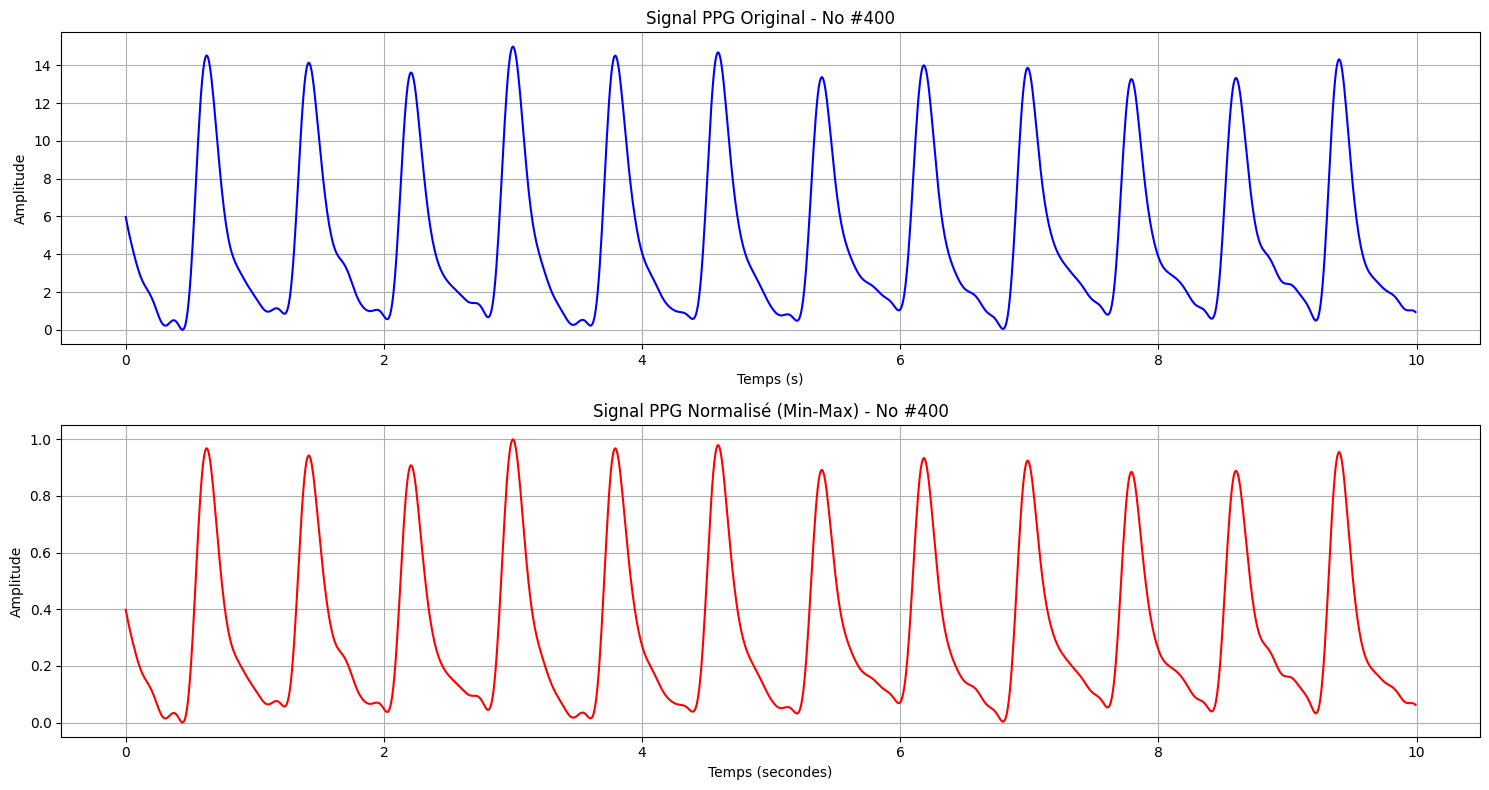

In [12]:
index = 400
ppg_avant = train_ppg[index, :]
ppg_apres = train_ppg_normalized_reshaped[index, :]

# pour l'affichage

fig, axes = plt.subplots(2, 1, figsize=(15, 4*2))

# pour le vecteur de temps
time = np.arange(1250) / 125
# print(time.shape)

# Signal avant normalisation
axes[0].plot(time, ppg_avant, 'b')
axes[0].set_title(f'Signal PPG Original - No #{index}')
axes[0].set_xlabel('Temps (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Signal après normalisation
axes[1].plot(time, ppg_apres, 'r')
axes[1].set_title(f'Signal PPG Normalisé (Min-Max) - No #{index}')
axes[1].set_xlabel('Temps (secondes)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Remarques et explications

On peut remarquer que l'amplitude du signal original a une échelle arbitraire, tandis que pour le signal normalisé nous sommes l'echelle est entre 0 et 1. Dans tous les cas la forme du signal est preservé (principe de la normalisation), et les differents variations sont maintenues egalement apres la normalisation.

## 2.4 Normalisation des labels 

Maintenant nous sommes interessé de proceder à la normalisation des labels. Nous avons deux labels dans cette exercise qui sont completment independentes donc la normalisation globale comme avant n'est pas adapté. Ici plutot on va normaliser chaque label individuelment sur la base de donnees d'entrainement et puis on appliquer ceux parametres calculé à la base de donnes de test comme vu à l'exercise 2.2 ci-dessus, pour garder une echelle coherente. Voici l'implementation :

In [13]:
label_scaler = MinMaxScaler()
train_labels_normalized = label_scaler.fit_transform(train_labels)
test_labels_normalized = label_scaler.transform(test_labels)

On veut valider comme meme notre normalisation. On peut observer que apres normalisation des label le minimum est 0 est le maximum est 1 comme attendue.

In [14]:
print("Avant normalisation:")
print(f"Train SBP - Min: {train_labels[:, 0].min()}, Max: {train_labels[:, 0].max()} mmHg")
print(f"Train DBP - Min: {train_labels[:, 1].min()}, Max: {train_labels[:, 1].max()} mmHg")

print("\nAprès normalisation:")
print(f"Train SBP normalisé - Min: {train_labels_normalized[:, 0].min()}, Max: {train_labels_normalized[:, 0].max()}")
print(f"Train DBP normalisé - Min: {train_labels_normalized[:, 1].min()}, Max: {train_labels_normalized[:, 1].max()}")

Avant normalisation:
Train SBP - Min: 48.70640248002842, Max: 218.27409303288795 mmHg
Train DBP - Min: 24.299941875515916, Max: 131.45101708709672 mmHg

Après normalisation:
Train SBP normalisé - Min: 0.0, Max: 1.0
Train DBP normalisé - Min: 0.0, Max: 1.0


!!!!! Dans cette derniere partie on va proceder avec une denormalisation via *inverse_transform* afin de verifier que les labels normalisés sont pas cassé ??  !!!!!

In [15]:
print(train_labels_normalized[:5])
prediction = label_scaler.inverse_transform(train_labels_normalized[:5]) #pour les labels de 5 premiers exemples

print(f"\nPrédiction normalisée: SBP={prediction[0, 0]:.2f}, DBP={prediction[0, 1]:.2f}")
print(f"Prédiction en mmHg: SBP={prediction[0, 0]:.1f}, DBP={prediction[0, 1]:.1f} mmHg")

[[0.50923243 0.24202631]
 [0.51200381 0.39248398]
 [0.28753061 0.26173005]
 [0.31732175 0.22973472]
 [0.40891019 0.38024489]]

Prédiction normalisée: SBP=135.06, DBP=50.23
Prédiction en mmHg: SBP=135.1, DBP=50.2 mmHg


# Exercise 3 - CNN/LTSM/MLP

On procede avec la defintion de la fonction *build_cnn_lstm* qui retoune un modele CNN-LTSM avec 4 blocks CNN, 3 blocks de LTSM avec une sortie qui peut prendre deux valeurs (SBP ou DBP), lorsque il a 4 couches denses.

**Nota bene:** Nous utiisons Keras pour cette implemnetation

In [16]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


**Notes:**

1. Le modele CNN est utilisé pour detecter des motifs locaux du signal PPG sans etre programmé auparavant. Comme ca on peut faire l'extraction/la caracterisation du signal.
2. Puis on utilise une serie des LTSMs pour garder en memoire cette serie temporelle (le signal PPG) à long terme pour faire des decisions à court terme.
3. Pour finalement appliquer notre modele MLP qui utilise ces donnes complexes pour estimer des valeurs numériques simple pour notre tâche de régression

Finallement il s'agit bien d'une architecture hybride pour l'estimation de la pression artérielle à partir de signaux PPG.

**Remarques:**

* Les couches de convolution 1D sont conçu pour les donnes sequentiels telles que les séries temporelles où le signal PPG fait partie.
* Nous avons deux choses à considerer quand on parle de la taille: 1) la dimension temporelle qui correspond au longeur du signal temporel à chaque niveau du model (nombre de pas de temps) et la 2) dimension spatiale qui correspond au nombre des caracteristiques par pas de temps.

## Construction de la fonction

Les arguments de la fonction *(input_shape, num_outputs=2)* correspondent à la forme du signal de l'entrée, et le nombre des sorties finaux. Par defaut ce dernier est declaré à 2 car nous avons soit SBP soit DBP, mais il est toujours declarable si jamais nous avons besoin.

In [17]:
from keras import Model
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, LSTM, Dense

def build_cnn_lstm_mlp(input_shape, num_outputs=2):

    # Etape 1 pour l'entree
    entrees = Input(shape=input_shape, name="PPG_input")

    # Etape 2 pour le bloc initial du CNN
    x = Conv1D(64, kernel_size=7, strides=2, padding="same", activation="relu")(entrees)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)

    # Etape 3 pour le 1er bloc CNN
    x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 4 pour le 2eme bloc CNN (128 filtres)
    x = Conv1D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 5 pour le 3eme bloc CNN (256 filtres)
    x = Conv1D(256, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 6 pour le 4eme bloc CNN (512 filtres)
    x = Conv1D(512, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(512, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 7 pour les couches LSTM
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64, return_sequences=False)(x)

    # Etape 8 pour les couches denses
    x = Dense(1024, activation="relu")(x)
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(256, activation="relu")(x)

    # Etape 9 pour la couche de sortie
    sorties = Dense(num_outputs, activation=None)(x)

    # Etape 10 pour la création du modèle
    model = Model(inputs=entrees, outputs=sorties, name="CNN_LSTM_MLP")

    return model

# Test
model = build_cnn_lstm_mlp(input_shape=(1250, 1), num_outputs=2)
model.summary()

2025-12-03 14:50:20.015247: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-12-03 14:50:20.015296: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-12-03 14:50:20.015300: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 12.48 GB
2025-12-03 14:50:20.015444: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-03 14:50:20.015460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "CNN_LSTM_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ PPG_input (InputLayer)          │ (None, 1250, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 625, 64)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 625, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 313, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 313, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 313, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 313, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 313, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 157, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 157, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 157, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 157, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 79, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 79, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 79, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 79, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 40, 512)        │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 40, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 40, 512)        │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 40, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,865,218 (14.74 MB)

 Trainable params: 3,861,250 (14.73 MB)

 Non-trainable params: 3,968 (15.50 KB)



## Reponses aux questions

### Question 1

Dans notre example nous avons comme taille d’entrée du modèle 1250 points temporels par 1 canaux.

### Question 2 

Au debut, dans le block initial, nous avons 1250 longueur de la séquence comme taille d'entrée du modele. Vue que nous avons declaré stride de 2, alors la convolution via le kernel va avancer de deux pas à la fois. Donc la taille apres la premier convolution est donnée par 1250 / 2 = 625 qui est coherent par rapport le résumé d'avant. Un batch normalisation n'affluence pas la taille de la sequence. Par contre le Max Pooling qui suit avec strides 2 va nous donner 625 / 2 = 313 selon le résume. 

Donc on rentre dans le premier block du CNN su rlequel on trouve deux normalisations par batch et deux convolutions 1D mais pas de stride declaré, ca veut dire qu'il n'y a pas de changement temporel, donc la taille ne change pas pendant le 1er block.

Lorsque du 2eme block, on trouve une seulle concolution avec un stride de 2 et deux normalisations par batch. Donc la nouvelle taille serait 313 / 2 = 157.

Maintenant on entre sur le 3eme block du CNN qui ce passe la meme chose que au 2eme block sauf que le nombre des filtres change. Donc pour la taille on aura 157 / 2 = 79. Meme concept pour le bloc 4 du CNN, ainsi au final a taille de sortie du CNN (avant le LSTM) est 79 / 2 = 40, la dimmension temporelle reduite. Cepednant la dimension spatiale a augmenté à 512 par rapport à 1 qu'on avait comme entrée.

### Question 3

Pour la taille d’entrée du LSTM ca va etre du coup selon la question 2 (40, 512), ca veut dire 40 pas de temps séquentiels et 512 caracteristiques par pas de temps.

### Question 4

Pour les deux niveau LTSM appliqué qui retournent des sequences, alors il n'y pas de modifcation sur la taille. Cepednant quand on applique *LSTM(64, return_sequences=False)(x)* alors ici on obtiens 64 (dimension spatiale) comme taille de sortie du LSTM (avant le Dense), et nous avons plus de la dimension temporelle car par definition un LSTM ... !!!!!!!!

**a)** Comme nous avons déjà evoques ci-dessus, le T la dimension temporelle compressée du signal donc c'est le le nombre de pas de temps.

**b)** De l'autre cote, D représente les caractéristiques extraites par le CNN ça veu dire c'est le nombre des caracteristiques.

**c)** Selon la question 30, le LTSM recoit 40 tranches temporelles où chaque tranche contient 512 caracteristiques extraites du signal PPG. C'est comme si e CNN découpait le signal en 40 moments clés et pour chaque moment, extrayait 512 informations pertinentes.

**d)** Dans un premier cas, imaginons que nous avons moins de filtres dans le dernier bloc convolutionnel avec strides/pooling inchangés. Alors il y a rien qui va changer concernant la a forme d’entrée du LSTM au niveau nombre de pas de temps , par contre au niveau de la dimension des caracteristiques elle serait reduite. Cela pourrait impacter le model du manier suivant : vue que le nombre des caracteristiques est diminué, alors nous sommes plus sensiles au sous-apprentisage. Le risque de sur-apprentisage est diminue egalement. Dans tous les cas l'apprentisage va etre plus facile vue que nous avons moins des parametres.

Dans un deuxieme cas si nous avons moins de sous-échantillonnage temporel, ca veut dire par exemple de upprimer un pooling ou mettre stride=1 dans une conv, alors on aura une taille de pas de temps elevée. Dans ce cas là le temps d'aprrentisage va augmenter car nous aurons des sequences de longueur plus grand (coûteux en calcul) mais potentielment avec meilleur results car le modele pourrait avoir plus des informations sur la forme temporelle. Par contre le risque de sur-apprentisage augmente dans ce cas.

### Question 5 

La taille finale de sortie du modèle sera 2 car on veut avoir justement la valeur de la pression systolique (SBP) et la valeur de la pression diastolique (DBP).

### Question 6

Nous avons pas choici une fontcion d'activation pour la sortie car on veut reccuperer une sortie lineaire qui nous permettra de faire la regression continue (notre objectif de base). Par exemple, Ssi on utilisait ReLU on aurait pas de valeurs négatives et si on utilisait sigmoid les valeurs seront limité entre 0 et 1, tandis que les valeurs de pression peuvent varier librement.

# Exercise 4 - Entraînement, validation et évaluation

## 4.1 Division des donnees

### Question 1

Ici nous donne 20% de la base des données pour la validation. Donc 80% qui reste va etre utilisé pour l'entainement. Pour le test il y a une base des données dedie pour ca. 


In [60]:
from sklearn.model_selection import train_test_split

# y_train = X_train_labels et y_val = X_val_labels
X_train, X_val, y_train, y_val = train_test_split(
    train_ppg_normalized_reshaped, 
    train_labels_normalized,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# declaration des X et y pour le test
X_test = test_ppg_normalized_reshaped
y_test = test_labels_normalized

### Question 2

Mainteant on verifie la taille des nos trois ensembles

In [61]:
print(f"Taille initiale de train_ppg_normalized_reshaped: {train_ppg_normalized_reshaped.shape}")
print(f"Entraînement: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test: X_test: {X_test.shape}, y_test: {y_test.shape}")

Taille initiale de train_ppg_normalized_reshaped: (5000, 1250)
Entraînement: X_train: (4000, 1250), y_train: (4000, 2)
Validation: X_val: (1000, 1250), y_val: (1000, 2)
Test: X_test: (500, 1250), y_test: (500, 2)


Alors, le 20% de 5000 est 1000 donc on peut bien observer que pour la validation nous avons 1000 echantillons et pour l'entrainement nous avons 5000-1000=4000 echatillons.

## 4.2 Entrainement avec Earlystopping

Dans cette partie nous allons compiler le modele d'entrainement tout en s'ajustant aux donnes d'entrainement.

### Question 1 - Preparation des donnees

Vue que la convolution 1D attend comme entree un objet de dimmension 3D de la forme (nb_exemples, longueur_sequence, nb_canaux) il faut ajouter encore une dimension à nos ensembles.

**Nota bene:** C'est demandé de le faire seulment pour le X_val et le X_train, mais quand on va tester la perfomance avec X_test, il faut qu'absolument X_test suit la meme logique. Donc ici on proceed avec une expansion pour l'ensemble d'entrainement, validation et test. 

In [23]:
from tensorflow import expand_dims

X_train_expanded = expand_dims(X_train, axis=-1)
X_val_expanded = expand_dims(X_val, axis=-1)
X_test_expanded = expand_dims(X_test, axis=-1)  

# Verification
print(f"X_train_expanded shape: {X_train_expanded.shape}")
print(f"X_val_expanded shape: {X_val_expanded.shape}")
print(f"X_test_expanded shape: {X_test_expanded.shape}")

X_train_expanded shape: (4000, 1250, 1)
X_val_expanded shape: (1000, 1250, 1)
X_test_expanded shape: (500, 1250, 1)


Le nombre des canaux est 1 ici car le signal PPG est un signal unique.

### Question 2 - Choix du batch size

Nous allons faire un apprentisage par batch (mini-lots) car le nombre des donnees est moderément important. Cette methode nous permet d'attenir une convergence plus rapide en comparaison avec l'apprentisage par full-batch (lots).

* Pour un taille de batch petite, on aura plus des mises a jour des parametres, mais on aura des calculs plus bruité.
* Pour un taille de batch grand, l'ntrainement va etre plus stable mais on aura besoin plus de stockage disponible et une perfomance eleve (niveau GPU/CPU) pour que le modele arrive de s'entrainer.

**Remarque:** Nous nstallns l'accelerateur GPU de tensorflow pour Mac pour utiliser la totalite des resources de la puche M1 Pro Max afin d'entrainer le modele à la question 5. 

In [21]:
%pip install tensorflow-macos
%pip install tensorflow-metal

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf

batch_size = 16

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_expanded, y_train)).shuffle(4000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_expanded, y_val)).batch(batch_size)

# Verification
print(f"Batches d'entraînement: {len(train_dataset)}")
print(f"Batches de validation: {len(val_dataset)}")

Batches d'entraînement: 250
Batches de validation: 63


Alors les results du nombre des batches sonr correct car pour 4000/16 = 250 fois des mis à jour des parametres. Pour la valication on a 1000/16 ~= 63 mises à jour des parametres. Finalement pour le test on a 500/16 ~= 32 mises à jours des parametres.

### Question 3 - Compilation

On va appliquer la fonction d'optimization Adam avec un taux d'apprentisage à 0.0001, plus petit que le défaut pour un apprentissage plus stable. MSE sera utilisé comme fonction de cout et comme métrique à suivre pendant l’entraînement. MAE est utilisé comme métrique à suivre pendant l’entraînement.

In [63]:
model = build_cnn_lstm_mlp((1250, 1)) # redefinition de la varibale model car elle etait utilise avant dans l'exercise 3
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

### Question 4 - Callbacks

Pour eviter le sur-apprentisage on va surveiller le *val_loss* et on va arreter l'apprentisage si la convergence ne s'evolue plus pour un nombre des epoques données, plu sprecisement on va arrêter l’entraînement s’il n’y a pas d’amélioration pendant 20 époques consécutives.

**Nota bene:** On utilise *restore_best_weights=True* pour pas perdre le modele avec les meilleurs performances.

In [64]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
)

Nous implementons un checkpoint pour finalement sauvegarder le meileur modele.

In [65]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
)

### Question 5 - Entrainement

On effectue l'entrainement pour 100 epoques. On avait dit que pour la base des donnes d'entainement, 1 epoque correspond à 250 mises à jours des parametres. Donc pour 100 on aura au total 25000 mises à jours au total.

In [67]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # M1 Pro Max Tensorflow-Metal

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[early_stopping, checkpoint],
)

print(f"Nombre d'époques effectuées: {len(history.history['loss'])}")

Num GPUs Available:  1
Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - loss: 0.0302 - mae: 0.1310 - val_loss: 0.0160 - val_mae: 0.0982
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - loss: 0.0161 - mae: 0.1003 - val_loss: 0.0382 - val_mae: 0.1620
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.0148 - mae: 0.0962 - val_loss: 0.0148 - val_mae: 0.0971
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - loss: 0.0161 - mae: 0.0998 - val_loss: 0.0190 - val_mae: 0.1099
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - loss: 0.0248 - mae: 0.1242 - val_loss: 0.0205 - val_mae: 0.1132
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - loss: 0.0193 - mae: 0.1112 - val_loss: 0.0153 - val_mae: 0.0983
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - loss: 0.0177 - mae: 0.1056 - val_loss: 0.0144 - val_mae: 0.0936
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - loss: 0.0163 - mae: 0.1009 - val_loss: 0.0151 - val_mae: 0.0963
Epoch 9/100
63/63

Nous remarquons que le dernier epoque qu'il a mis à jour les poids etait l'epoque No 17 car pour les 20 prochaines Keras n'a pas reussi de trouver un meuilleur *val_loss* un utilisant la methode min qui etait explicitement décrit au model Keras.

## 4.3 Courbes d'entrainement/validation

Ci-dessous on effectue l'extraction des donnes via *history.history['val_loss']* et *history.history['loss']* ainsi que pour le nombre des epoques total est donné par *range(1, len(train_loss) + 1)*.

À noter qu'il serait interessant d'observer aussi l'evlution du MAE utilisé comme le metrique qui est observé pendant l'entrainement pour du coup defiir si le loss etait diminué ou pas. C'est pourquoi on procede avec l'extracation de ce dernier aussi.

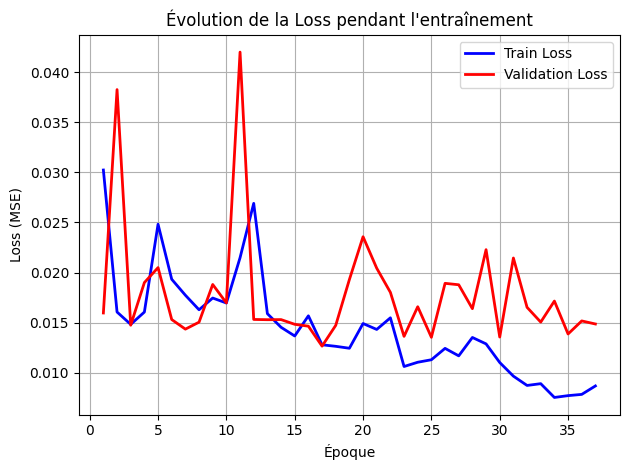

In [70]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_loss) + 1) # format vecteur pour l'affichage

# Pour loss
plt.plot(epochs, train_loss, 'b-', label='Train Loss', linewidth=2)
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
plt.xlabel('Époque')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la Loss pendant l\'entraînement')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Analyse/Interprétation

Nous observons dans le graphe des courbes d'entrainement et de validation que le modele ne convergait plus significativement à partir de l'epoque 14. En ce qui concerne la question de sur-ajustement ou sous-ajustement, le modele une fois qu'il a appliqué la base des donnees de validation, la majorite des fois est au-dessous du loss de la base de donnes d'entrainement, donc nous avons pas de sur-apprentisage avant l'epoche 17. On peut valider ca aussi avec la methode *argmin* que nous avons decouverte lorsque du TP1.

In [71]:
min_val_loss_epoch = np.argmin(val_loss) + 1
if val_loss[-1] > val_loss[min_val_loss_epoch-1] * 1.1:
    print(f"Surajustement détecté après l'époque {min_val_loss_epoch}")
else:
    print(f"Pas de surajustement significatif détecté")

Surajustement détecté après l'époque 17


## 4.4 Evaluation du modele

Ici nous allons charger le meuilleur modele qui est sauvegardé sous le nom *best_model.keras*. Via la fonction *evaluate()* sur notre base de donnees de test, on va obtenir la perte finale et la MAE.

**Nota bene:** Nous avons deja pris en compte avant (pendant la creation des datasets et l'expansion de la dimension pour inclure le 1 canal d'information) que l’ensemble de test doit avoir la même dimension étendue que celles utilisées pour les ensembles d’entraînement et de validation.

In [72]:
best_model = tf.keras.models.load_model('best_model.keras')
test_loss, test_mae = best_model.evaluate(X_test_expanded, test_labels_normalized)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0144 - mae: 0.0911
Test Loss: 0.0144, Test MAE: 0.0911


**Remarque:** Ici on voit que Keras a fait 16/16. En fait nous avons 500 exemples dans la base de donnes de tests. Par defaut Keras utilise 32 comme btach size pour evaluate, donc en faisant 500/32 = 15,625 ~= 16 pour l'evaluation du modele en utilisant la base de donnees. 

On fait des predictions via la fonction *prediction()* afin d'obtenir des valeurs de la pression arterielle prédites sur l’ensemble de test complet.

In [73]:
predictions = best_model.predict(X_test_expanded) # prediction sur l'ensemble de test

print(predictions.shape)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
(500, 2)


On peut observer que nous avons 500 echanillons et pour chaque echantillon nous avons deux collones, une collone pour la valeur SBP predit et une collone pour la valeur DBP predicted. Vous que les sorties du modele sont normalisé, il faut absolument utiliser la fonction *inverse_transform()* pour recupper les valeurs predits en mmHg.

In [74]:
predictions_mmHg = label_scaler.inverse_transform(predictions) #denormalisation des predictions
targets_mmHg = label_scaler.inverse_transform(y_test)

Pour finalement calculer et afficher les metriques suivantes via numpy et *sklearn.metrics.mean_absolute_error*:

* ME
* MAE
* PD 

In [75]:
from sklearn.metrics import mean_absolute_error

def calcul_metriques(true_values, predicted_values, label):
    errors = predicted_values - true_values
    me = np.mean(errors)
    mae = mean_absolute_error(true_values, predicted_values)
    sde = np.std(errors)

    print(f"\n{label}:")
    print(f"- ME (Erreur Moyenne): {me:.2f} mmHg")
    print(f"- MAE (Erreur Absolue Moyenne): {mae:.2f} mmHg")
    print(f"- SDE (Écart-type de l'erreur): {sde:.2f} mmHg")
    
    return me, mae, sde

# Pour SBP
sbp_me, sbp_mae, sbp_sde = calcul_metriques(
    targets_mmHg[:, 0], 
    predictions_mmHg[:, 0],
    "SBP (Pression Systolique)"
)

# Pour DBP
dbp_me, dbp_mae, dbp_sde = calcul_metriques(
    targets_mmHg[:, 1],
    predictions_mmHg[:, 1],
    "DBP (Pression Diastolique)"
)


SBP (Pression Systolique):
- ME (Erreur Moyenne): -2.48 mmHg
- MAE (Erreur Absolue Moyenne): 15.12 mmHg
- SDE (Écart-type de l'erreur): 19.91 mmHg

DBP (Pression Diastolique):
- ME (Erreur Moyenne): -1.36 mmHg
- MAE (Erreur Absolue Moyenne): 9.97 mmHg
- SDE (Écart-type de l'erreur): 12.96 mmHg


## 4.5 Visualisation des résultats

Dans cette partie on veut visualiser les perfomances du modele pour mieux comprendre son comportement.

### Question 1 et 2

On cree un nuage des points avec les valeurs de references sur l'axe X et les valeurs predites sur l'axe Y pour SBP et DBP respectivement.

Puis, on fait une graphique de Bland–Altman, une pour SBP et une pour DBP, pour lesquels l'axe x doit représenter la moyenne des valeurs prédites et cibles, et l'axe y doit représenter la différence entre valeurs prédites et cibles.

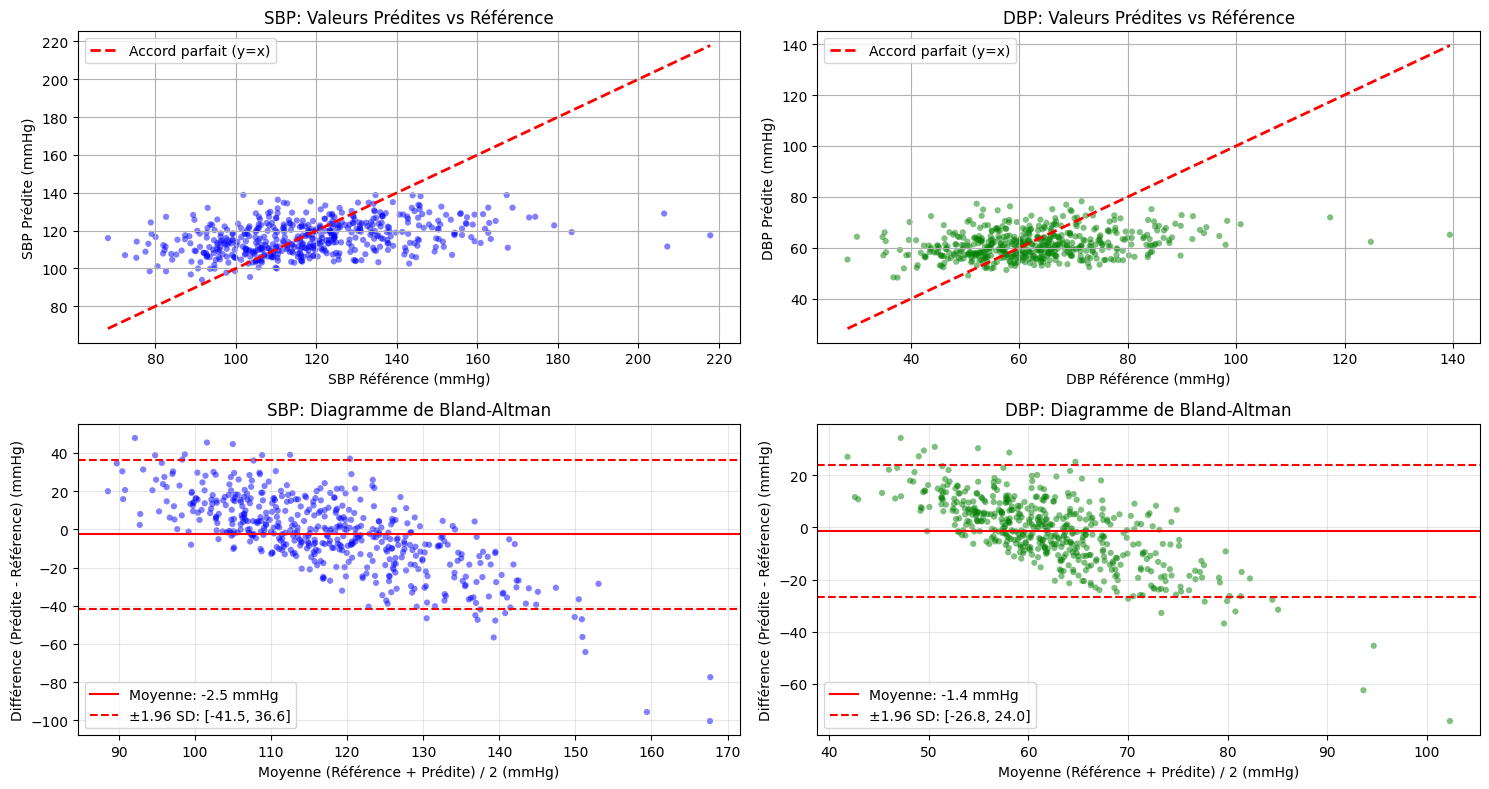

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(15, 4 * 2))

# Pour SBP
axes[0, 0].scatter(targets_mmHg[:, 0], predictions_mmHg[:, 0], alpha=0.5, s=20, c='blue', edgecolors='none')
axes[0, 0].plot([targets_mmHg[:, 0].min(), targets_mmHg[:, 0].max()], [targets_mmHg[:, 0].min(), targets_mmHg[:, 0].max()], 'r--', linewidth=2, label='Accord parfait (y=x)')
axes[0, 0].set_xlabel('SBP Référence (mmHg)')
axes[0, 0].set_ylabel('SBP Prédite (mmHg)')
axes[0, 0].set_title('SBP: Valeurs Prédites vs Référence')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Pour DBP
axes[0, 1].scatter(targets_mmHg[:, 1], predictions_mmHg[:, 1], alpha=0.5, s=20, c='green', edgecolors='none')
axes[0, 1].plot([targets_mmHg[:, 1].min(), targets_mmHg[:, 1].max()], [targets_mmHg[:, 1].min(), targets_mmHg[:, 1].max()], 'r--', linewidth=2, label='Accord parfait (y=x)')
axes[0, 1].set_xlabel('DBP Référence (mmHg)')
axes[0, 1].set_ylabel('DBP Prédite (mmHg)')
axes[0, 1].set_title('DBP: Valeurs Prédites vs Référence')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Calculs pour Bland-Altman
sbp_mean = (targets_mmHg[:, 0] + predictions_mmHg[:, 0]) / 2
sbp_diff = predictions_mmHg[:, 0] - targets_mmHg[:, 0]

sbp_mean_diff = np.mean(sbp_diff) # différence moyenne
sbp_std_diff = np.std(sbp_diff) # écart-type des différences

sbp_upper_limit = sbp_mean_diff + 1.96 * sbp_std_diff  # différence moyenne ± 1.96 × écart-type des différences
sbp_lower_limit = sbp_mean_diff - 1.96 * sbp_std_diff


dbp_mean = (targets_mmHg[:, 1] + predictions_mmHg[:, 1]) / 2
dbp_diff = predictions_mmHg[:, 1] - targets_mmHg[:, 1]

dbp_mean_diff = np.mean(dbp_diff)
dbp_std_diff = np.std(dbp_diff)
dbp_upper_limit = dbp_mean_diff + 1.96 * dbp_std_diff
dbp_lower_limit = dbp_mean_diff - 1.96 * dbp_std_diff

# Bland-Altman pour SBP
axes[1, 0].scatter(sbp_mean, sbp_diff, alpha=0.5, s=20, c='blue', edgecolors='none')
axes[1, 0].axhline(sbp_mean_diff, color='red', linestyle='-', 
                   label=f'Moyenne: {sbp_mean_diff:.1f} mmHg')
axes[1, 0].axhline(sbp_upper_limit, color='red', linestyle='--',
                   label=f'±1.96 SD: [{sbp_lower_limit:.1f}, {sbp_upper_limit:.1f}]')
axes[1, 0].axhline(sbp_lower_limit, color='red', linestyle='--')
axes[1, 0].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1, 0].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1, 0].set_title('SBP: Diagramme de Bland-Altman')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bland-Altman pour DBP
axes[1, 1].scatter(dbp_mean, dbp_diff, alpha=0.5, s=20, c='green', edgecolors='none')
axes[1, 1].axhline(dbp_mean_diff, color='red', linestyle='-',
                   label=f'Moyenne: {dbp_mean_diff:.1f} mmHg')
axes[1, 1].axhline(dbp_upper_limit, color='red', linestyle='--',
                   label=f'±1.96 SD: [{dbp_lower_limit:.1f}, {dbp_upper_limit:.1f}]')
axes[1, 1].axhline(dbp_lower_limit, color='red', linestyle='--')
axes[1, 1].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1, 1].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1, 1].set_title('DBP: Diagramme de Bland-Altman')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Question 3

Selon le graphe de la fonction de cout et de MAE, nous remarquons que après l'epoque 35 il existe une instabilite sur l'entrainement. Cepednant, le bse de donne de validation suit bien l'etrainement qui est un bon indicateur en ce qui concerne la generalisation generale du probleme.

#### Pour le SBP

Sur le diagramme de Bland-Altman, le biais moyene est quasi nul. De l'autre cote, les limites d'accord sont plus assez larges. En effet, les erreurs augmentent avec la magnitude des valeurs. Pour les grands valeurs, il y a une tendance d'avoir une sous-estimation.

#### Pour le DBP

Dans ce vas là le biais moyen est un peu plus eleve mais pas dramatiquement, cependant les limites d'accord sont toujours large mais mieux par rapport le SBP. La sous-estimations pour les valeurs eleves est plus important que pour le cas de SBP.

#### En general

On peut dire que le modèle a la tendance de prédire les valeurs moyennes, tout en sous-estimant les extrêmes. De plus, la variance des erreurs n'est pas constante. Effectivement, nous avons une distribution non equilibré qui est causé probablement par le fait que nous avaons moins d'exemples aux valeurs extrêmes dans les données d'entraînement. Dans ce cadre là, la fonction de cout MSE penalise tres fortement le modele dans le cas des grades erreurs. Ainsi peut etre le modele est complexe pour la taille de notre base de donnes (echantillons disponibles pour l'entrainement).

Pour lutter contre ces problemes, on pourrait augmenter les donnees ciblés soit en appliquant des transformations légères aux signaux PPG des cas extrêmes soit en surééchantillonnant les cas avec pressions extrême. En plus, on pouvait ajouter plus de dropouts dans les couches finales, ou utiliser la normalisation par batch dans les couches dense selon le cours.

## 4.6 Réglage des hyperparamètres

Ici on va essayer 'observer les resultats pour le reglage d'autres hypeparametres et comment ca va impacer l'efficacite. Pour cela voici le choix:

- On change le batch size de 16 à 32
- Le learning_rate change de 0.0001 à 0.001
- On garde le principe d'etrainement par EarlyStoping

À noter que nous avons pas besoin de refaire une preparation des donnes (expnasion puis normalisation) mais vue que le batch_size change, alors il faut absolument recreer les dataset pour faire l'evaluation et l'entrainement.

In [77]:
import pandas as pd

# Les combinaisons
batch_sizes = [16, 32, 64]
learning_rates = [1e-4, 1e-3]
results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Batch Size = {batch_size}, Learning Rate = {lr}\n")
        
        # Formatage du learning rate pour le nom de fichier (remplacer le point par 'e')
        lr_str = f"{lr:.0e}".replace('.', '_').replace('+', '').replace('-0', '-')
        model_name = f"best_model_b{batch_size}_lr{lr_str}.keras"
        
        # CRecreation de datasets en fonction du batch_size choisi
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train_expanded, y_train)).shuffle(4000).batch(batch_size)
        val_dataset = tf.data.Dataset.from_tensor_slices((X_val_expanded, y_val)).batch(batch_size)
        
        # Construction
        model = build_cnn_lstm_mlp((1250, 1))
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse',
            metrics=['mae']
        )
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            mode='min',
            verbose=0
        )
        
        checkpoint = tf.keras.callbacks.ModelCheckpoint(
            model_name,
            save_best_only=True,
            monitor='val_loss',
            mode='min',
            verbose=0
        )
        
        # Entraînement
        print(f"Début de l'entraînement...")
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=100,
            callbacks=[early_stopping, checkpoint],
            verbose=0
        )
        
        
        epochs_completed = len(history.history['loss'])
        
        # Chargement du meilleur modele
        best_model = tf.keras.models.load_model(model_name)
        
        # Évaluation sur l'ensemble de test
        test_loss, test_mae = best_model.evaluate(X_test_expanded, test_labels_normalized, verbose=0)
        
        # Predictions
        predictions = best_model.predict(X_test_expanded, verbose=0)
        predictions_mmHg = label_scaler.inverse_transform(predictions)
        targets_mmHg = label_scaler.inverse_transform(y_test)
        
        # Pour SBP
        sbp_errors = predictions_mmHg[:, 0] - targets_mmHg[:, 0]
        sbp_me = np.mean(sbp_errors)
        sbp_mae = np.mean(np.abs(sbp_errors))
        sbp_sde = np.std(sbp_errors)
        
        # pour DBP
        dbp_errors = predictions_mmHg[:, 1] - targets_mmHg[:, 1]
        dbp_me = np.mean(dbp_errors)
        dbp_mae = np.mean(np.abs(dbp_errors))
        dbp_sde = np.std(dbp_errors)
        
        # Extraction des metriques
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        best_val_loss = min(history.history['val_loss'])
        final_train_mae = history.history['mae'][-1]
        final_val_mae = history.history['val_mae'][-1]
        
        # Resultats en memoire
        results.append({
            'Batch Size': batch_size,
            'Learning Rate': lr,
            'Époques': epochs_completed,
            'Train Loss': final_train_loss,
            'Val Loss': final_val_loss,
            'Best Val Loss': best_val_loss,
            'Test Loss': test_loss,
            'Train MAE': final_train_mae,
            'Val MAE': final_val_mae,
            'Test MAE': test_mae,
            'SBP ME': sbp_me,
            'SBP MAE': sbp_mae,
            'SBP SDE': sbp_sde,
            'DBP ME': dbp_me,
            'DBP MAE': dbp_mae,
            'DBP SDE': dbp_sde,
            'Model File': model_name
        })
        
        # Affichage
        print(f"Époques complétées: {epochs_completed}")
        print(f"\nPerformances sur l'ensemble de TEST:")
        print(f"  - Test Loss (MSE): {test_loss:.4f}")
        print(f"  - Test MAE: {test_mae:.4f}")
        print(f"\nMétriques SBP:")
        print(f"  - ME (Erreur Moyenne): {sbp_me:.2f} mmHg")
        print(f"  - MAE (Erreur Absolue Moyenne): {sbp_mae:.2f} mmHg")
        print(f"  - SDE (Écart-type): {sbp_sde:.2f} mmHg")
        print(f"\nMétriques DBP:")
        print(f"  - ME (Erreur Moyenne): {dbp_me:.2f} mmHg")
        print(f"  - MAE (Erreur Absolue Moyenne): {dbp_mae:.2f} mmHg")
        print(f"  - SDE (Écart-type): {dbp_sde:.2f} mmHg")
        print(f"\nModèle sauvegardé: {model_name}")
        print("---\n")
        
        # Nettoyage de la mémoire
        del model, best_model, history
        tf.keras.backend.clear_session()


# Création du DataFrame avec tous les résultats
df_results = pd.DataFrame(results)

# Meilleure configuration selon différents critères
best_test_loss_idx = df_results['Test Loss'].idxmin()
best_sbp_mae_idx = df_results['SBP MAE'].idxmin()
best_dbp_mae_idx = df_results['DBP MAE'].idxmin()

print("--------------------")
print(f"\nMeilleure Test Loss (MSE):")
print(f"- Batch Size: {df_results.loc[best_test_loss_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_test_loss_idx, 'Learning Rate']}")
print(f"- Test Loss: {df_results.loc[best_test_loss_idx, 'Test Loss']:.4f}")

print(f"\nMeilleure SBP MAE:")
print(f"- Batch Size: {df_results.loc[best_sbp_mae_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_sbp_mae_idx, 'Learning Rate']}")
print(f"- SBP MAE: {df_results.loc[best_sbp_mae_idx, 'SBP MAE']:.2f} mmHg")

print(f"\nMeilleure DBP MAE:")
print(f"- Batch Size: {df_results.loc[best_dbp_mae_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_dbp_mae_idx, 'Learning Rate']}")
print(f"- DBP MAE: {df_results.loc[best_dbp_mae_idx, 'DBP MAE']:.2f} mmHg")


Batch Size = 16, Learning Rate = 0.0001

Début de l'entraînement...
Époques complétées: 34

Performances sur l'ensemble de TEST:
  - Test Loss (MSE): 0.0142
  - Test MAE: 0.0902

Métriques SBP:
  - ME (Erreur Moyenne): -3.00 mmHg
  - MAE (Erreur Absolue Moyenne): 15.38 mmHg
  - SDE (Écart-type): 19.91 mmHg

Métriques DBP:
  - ME (Erreur Moyenne): -2.23 mmHg
  - MAE (Erreur Absolue Moyenne): 9.62 mmHg
  - SDE (Écart-type): 12.58 mmHg

Modèle sauvegardé: best_model_b16_lr1e-4.keras
---

Batch Size = 16, Learning Rate = 0.001

Début de l'entraînement...
Époques complétées: 24

Performances sur l'ensemble de TEST:
  - Test Loss (MSE): 0.0174
  - Test MAE: 0.1038

Métriques SBP:
  - ME (Erreur Moyenne): 7.51 mmHg
  - MAE (Erreur Absolue Moyenne): 18.86 mmHg
  - SDE (Écart-type): 21.86 mmHg

Métriques DBP:
  - ME (Erreur Moyenne): -0.50 mmHg
  - MAE (Erreur Absolue Moyenne): 10.32 mmHg
  - SDE (Écart-type): 13.67 mmHg

Modèle sauvegardé: best_model_b16_lr1e-3.keras
---

Batch Size = 32, Lear

Ici nous avons testé 6 combinaisons d'hyperparamètres pour essayer optimiser notre modèle CNN-LSTM-MLP. En general, les grands batch sizes avec learning rate élevé devraient converger plus rapidement mais potentiellement vers des solutions sous-optimales. De l'autre cote, les petits batch sizes avec learning rate faible devraient donner des résultats plus stables mais nécessiter plus de temps.

Pour un batch size à 32, on attend d'etre 2 fois plus rapide que le batch size 16 avec un gradient plus stable (quand on considere le meme learning rate à 0.0001). Pour un batch size on attend un entrainement encore plus rapide mais on risque d'avoir une convergence vers un minimum local.

En ce qui cocnerne, pour le learning rate à 0.0001, on attend comme meme une convergance stable et progressive avec un risque reduit d'oscillations. Cependant la convergence est plus lente. De l'autre cote, pour 0.001 on aura une convergence 10 fois plus rapide mais il peut "sauter" par-dessus de bons minima.

Le meilleure model est celui avec taille de batch à 64 et taux d'apprentisage à 0.001

# Exercise 5 - Impact du taux d’échantillonnage

...